In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style

In [118]:
issues_df = pd.read_csv("issues.csv") # dataset of Issues 
prs_df = pd.read_csv("prs.csv")       # prs
repos_df = pd.read_csv("repos.csv")   # repository dataset
languages = issues_df['name'].values

### Number of Repositories by Language

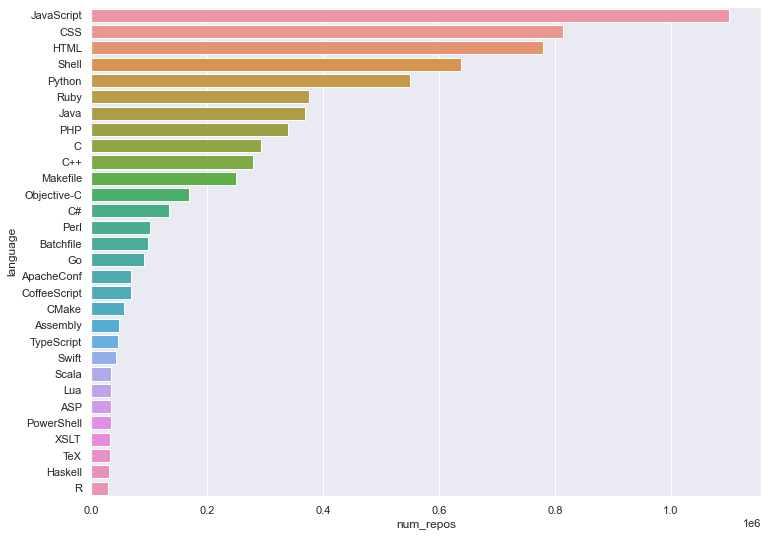

In [119]:
top_lang = repos_df.sort_values(by='num_repos', ascending = False)[:30]
plt.figure(figsize = (12,9))
g = sns.barplot(data = top_lang, x = 'num_repos', y = 'language')

### Total number of issues through time

In [120]:
issues_df.head(2)

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694


In [121]:
# first combine year and quarter in same column to convert to time data
def correct_date(df):
    df['date'] = df['year'].astype('str') + '-' + (df['quarter']*3-2).astype('str').str.pad(2,fillchar='0')
    df['date'] = pd.to_datetime(df['date'], format = '%Y-%m')
    df.drop(['year','quarter'], axis = 1, inplace = True)
    df = df[df['date'] < '2022-01-01'] # there's few data on 2022
    return df
issues_df = correct_date(issues_df)
prs_df = correct_date(prs_df)

In [122]:
issues_df.head(2)

,name,count,date
0,Ruby,965,2011-07-01
1,JavaScript,694,2011-07-01


In [123]:
prs_df.head(2)

,name,count,date
0,Ruby,632,2011-07-01
1,PHP,484,2011-07-01


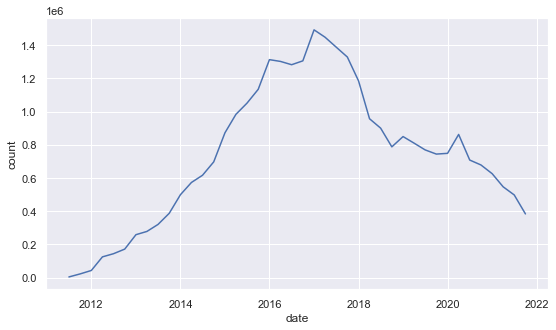

In [124]:
total_issues = issues_df.groupby(['date']).sum()
plt.figure(figsize= (9,5))
ax.axes.set_title('Total Issues',fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Issues', fontsize=15)
ax = sns.lineplot(data = total_issues, x = 'date', y = 'count')

### Total issues by language

In [126]:
top_10 = issues_df.groupby(['name']).sum().sort_values('count', ascending = False)['count'][:10].index
top_10

Index(['JavaScript', 'Python', 'Java', 'PHP', 'C++', 'TypeScript', 'Go', 'C#',
       'Ruby', 'C'],
      dtype='object', name='name')

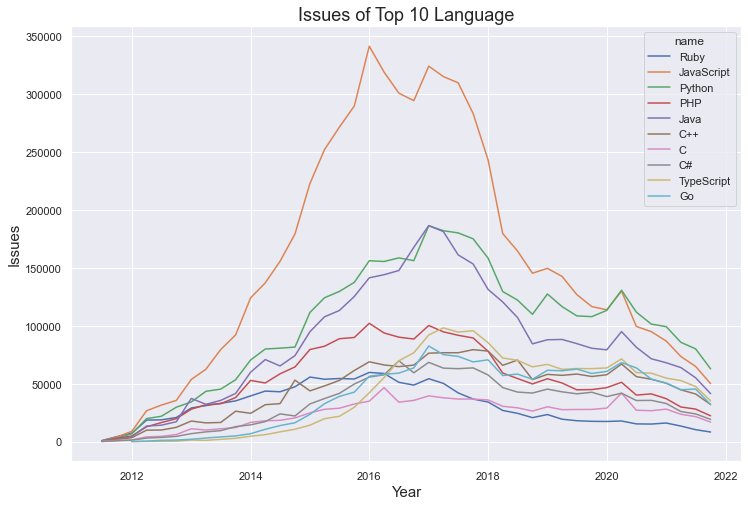

In [127]:
top_issues = issues_df[issues_df['name'].isin(top_10)]
plt.figure(figsize = (12,8))
ax = sns.lineplot(data = top_issues, x = 'date', y = 'count', hue = 'name')
ax.axes.set_title('Issues of Top 10 Language',fontsize=18)
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Issues", fontsize = 15);